<div style ="border: blue solid 1px;
             font-family: cambria;
             box-shadow: 0px 0px 100px rgba(0, 0, 0, 0.5);
             background-image: url(1.jpg);
             height: 100%;
             width: 100%;">
<center>
<a href="#" >
    <h1> <font color="white">PROJET DE PYTHON 2A - ENSAE IP Paris</font> </h1> 
    <h2> <font color="white">Thème : Determinants des choix d'orientation des etudiants dans les etablissments d'enseignement superieur</font> </h2> 
<a href="#" >
    <img src="ensae_picture.PNG" style="float:right; max-width: 190px; display: inline" alt="ENSAE" ; height: 100%;" /></a>     
</center>
</div>

In [174]:
#Appel du notebook contenant les packages
%run ./head.ipynb
#Appel du notebook contenant des fonctions définies
%run ./function.ipynb
add_notebook_menu()

Tout est ok ! 
Tout est ok ! 


In [175]:
#Ajout de ligne

## <center>1. Importation des données</center>

In [176]:
#Racine principale de récupération des données
glob_path = "https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset="

### 1.2 Vœux de poursuite d'études et de réorientation dans l'enseignement supérieur et réponses des établissements



https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-parcoursup/information/

###### On a 12760 lignes d'individus et l'Api ne permet pas de récupérer plus de 10 000 lignes et donc on a troué comme astuce de récupérer selon le type de l'établissement avant de merger les bases


In [177]:
#Segmentation pour pouvoir tout récupérer car l'API n'autorise pas plus de 10 000 lignes 
type_etablissement = ["2_Lyc%C3%A9es", "1_Universit%C3%A9s", "3_Autres+formations"]


In [178]:
#Le lien de récupération
voeux_poursuite = glob_path+"fr-esr-parcoursup&rows=6020&sort=tri&facet=session&facet=contrat_etab&facet=cod_uai&facet=g_ea_lib_vx&facet=dep_lib&facet=region_etab_aff&facet=acad_mies&facet=select_form&facet=fili&facet=form_lib_voe_acc&facet=regr_forma&facet=fil_lib_voe_acc&facet=detail_forma&facet=tri&facet=cod_aff_form&q="


In [179]:
#Récupération selon le type d'établissement
data_etablissement = [requests.get(voeux_poursuite + type_etablissement[x]) for x in range(3)]

In [180]:
#Vérification
data_etablissement

[<Response [200]>, <Response [200]>, <Response [200]>]

In [181]:
#Conversion de json à pd.Dataframe
data_etablissement = [pd.json_normalize(x.json()['records'][:]) for x in data_etablissement ]

In [182]:
glob_data = pd.concat(data_etablissement)
glob_data.columns = [c.replace('fields.', '') for c in list(glob_data.columns) ]

# -------------------------------------------- DOULO---------------------------

### Fouille des données et Statistiques descriptives 

In [183]:
glob_data.shape[1]

120

In [184]:
df = glob_data.copy()


In [185]:
#df = df.rename(columns = names)
df

,datasetid,recordid,record_timestamp,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,fil_lib_voe_acc,acc_brs,acc_bg,tri,acc_bg_mention,session,form_lib_voe_acc,cod_aff_form,fili,lien_form_psup,prop_tot_bp_brs,acad_mies,taux_adm_psup_gen,contrat_etab,pct_bp_mention,ran_grp3,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,lib_comp_voe_ins,cod_uai,pct_acc_debutpp,dep,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_etab_orig,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,g_ea_lib_vx,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,acc_term,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,region_etab_aff,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,lib_grp2,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,lib_grp1,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,acc_term_f,lib_grp3,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,g_olocalisation_des_formations,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,ran_grp2,nb_voe_pc_bg,dep_lib,acc_bp,select_form,acc_b,pct_acc_datebac,taux_adm_psup_techno,geometry.type,geometry.coordinates,detail_forma,nb_cla_pp_internat,nb_voe_pp_internat,acc_internat,nb_cla_pp_pasinternat,regr_forma,lib_grp5,ran_grp4,ran_grp5,lib_grp4
0,fr-esr-parcoursup,5ddd4059ccae7206ae2f39b37d08495258e52dff,2021-02-04T13:10:28.998000+00:00,21,19,4,30.769231,Métiers de l'eau,9,1,2_Lycées,0,2020,BTS - Production,23320,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,3.0,La Réunion,6.0,Public,15.38,4,13.0,1,3,10,38,96,2.0,13.0,92.31,37.0,15,145,140,Lycée de St Paul 4 - BTS - Production - Métier...,9741380G,12.50,974,4.0,0.0,22.0,7.69,0.0,6,12,Lycée de St Paul 4,46.153846,3,81.25,2,12,41.0,7.692308,69.23,1,12,12.50,7,90,1.0,47,1,12.0,16,La Réunion,2,76.923077,3.0,57,0,13,Tous les candidats sauf les Bac technologiques...,2,4,0,3.0,15.0,3,8,2,Bacheliers technologiques toutes séries,50,13,5,0.00,15.384615,2.0,0.0,Bacheliers professionnels toutes séries,81.25,92.31,1,10,23.076923,"[-20.9794, 55.3165]",34.0,53.85,67,3,0,La Réunion,2,formation selective,3,75.00,81.0,Point,"[55.3165, -20.9794]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fr-esr-parcoursup,a7f51872796481d96bbfcc6cfcc1fd13a8a291c3,2021-02-04T13:10:28.998000+00:00,9,8,3,0.000000,"Analyse, conduite et stratégie de l'entreprise...",0,0,2_Lycées,0,2020,BTS - Agricole,23461,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,2.0,Clermont-Ferrand,0.0,Public,100.00,10,1.0,0,3,0,2,11,0.0,100.0,0.00,9.0,1,46,31,AgroSup Dijon Direction Enseignement à Distanc...,0632001H,100.00,63,8.0,100.0,2.0,0,0.0,0,0,AgroSup Dijon Direction Enseignement à Distanc...,0.000000,2,100.00,0,6,4.0,0.000000,0.00,9,0,0.00,0,20,0.0,25,3,1.0,1,Auvergne-Rhône-Alpes,0,0.000000,3.0,4,0,2,Bacheliers professionnels toutes séries,1,0,1,5.0,20.0,0,3,0,Tous les candidats sauf les Bac technologiques...,23,1,15,0.00,100.000000,1.0,0.0,Bacheliers technologiques toutes séries,100.00,0.00,5,2,0.000000,"[45.7749, 3.1766]",65.0,0.00,8,6,1,Puy-de-Dôme,1,formation selective,0,100.00,0.0,Point,"[3.1766, 45.7749]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fr-esr-parcoursup,94819eeabba33cc018ac8925f34d5b6fa795f0cd,2021-02-04T13:10:28.998000+00:00,158,26,28,50.000000,Aménagements paysagers,0,1,2_Lycées,0,2020,BTS - Agricole,23462,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,8.0,Clermont-Ferrand,25.0,Public,50.00,23,3.0,1,22,0,13,53,4.0,25.0,0.00,40.0,3,455,265,AgroSup Dijon Direction Enseignement à Distanc...,0632001H,25.00,63,21.0,0.0,10.0,0,0.0,1,0,AgroSup Dijon Direction Enseignement à Distanc...,50.000000,13,75.00,6,24,54.0,50.000000,0.00,114,0,50.00,0,126,0.0,117,36,3.0,4,Auvergne-Rhône-Alpes,3,0.000000,25.0,13,0,10,Tous les candidats sauf les Bac technologiques...,1,1,0,31.0,20.0,2,35,2,Bachelie

In [186]:
##Modifier les indexes
df.set_index('cod_uai',inplace=True)


In [187]:
df.dtypes

datasetid           object
recordid            object
record_timestamp    object
nb_voe_pp_at         int64
nb_voe_pp_bp         int64
                     ...  
regr_forma          object
lib_grp5            object
ran_grp4            object
ran_grp5            object
lib_grp4            object
Length: 119, dtype: object

In [188]:
# Stockage des types numériques dans une liste
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [189]:
# Résumé des variables quentitatives
df.select_dtypes(include=numerics).describe()

,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,acc_brs,acc_bg,acc_bg_mention,prop_tot_bp_brs,taux_adm_psup_gen,pct_bp_mention,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,pct_acc_debutpp,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,acc_term,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,acc_term_f,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,nb_voe_pc_bg,acc_bp,acc_b,pct_acc_datebac,taux_adm_psup_techno,nb_cla_pp_internat,nb_voe_pp_internat,acc_internat,nb_cla_pp_pasinternat
count,12760.000000,12760.000000,12760.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,11698.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,11698.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12695.000000,12760.000000,12601.000000,12760.000000,12601.000000,12760.000000,12760.000000,12601.000000,12760.000000,12695.000000,12760.000000,12760.000000,12526.000000,12601.000000,12601.000000,12760.000000,12760.000000,12695.000000,12760.000000,12760.000000,6020.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12759.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12601.000000,12601.000000,12760.000000,6020.000000,12695.000000,12601.000000,12760.000000,12760.000000,12601.000000,12526.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12695.000000,11698.000000,847.000000,847.000000,847.000000,847.000000
mean,222.791928,63.848511,380.880251,29.845946,9.911677,26.632053,19.522884,7.386991,50.230894,17.698738,46.761599,4.731740,309.672179,8.313636,25.545925,127.427743,26.056583,21.406309,72.646146,37.063323,47.670063,829.426646,794.948433,26.037591,18.408777,11.812738,11.002743,0.445230,13.108307,28.723041,34.242406,3.969514,87.773350,62.047414,44.077743,395.533929,48.605589,26.916732,17.985345,31.516536,50.492940,5.385423,592.058229,4.650997,267.417320,5.537539,40.452508,52.797179,49.965517,27.921273,154.123433,38.856270,0.185188,26.302429,3.812774,11.024138,5.837226,57.821944,58.946156,12.865361,148.965517,29.352351,469.855251,39.930486,34.478213,34.332666,23.473138,14.181191,1.762126,76.219605,78.345634,12.736364,17.455016,23.653667,52.202698,17.677300,89.342790,6.985815,4.984796,9.775549,75.135028,27.563173,91.135773,471.963400,12.308146,514.367178
std,463.296751,107.427396,810.847901,23.133849,17.872469,63.401771,50.923177,12.106941,33.763627,21.309215,78.710696,15.358778,679.835142,11.331093,45.854514,198.522070,53.934757,23.574079,25.279103,50.486630,82.361416,1232.570749,1233.402317,21.796236,26.003716,19.392675,17.147422,2.395116,23.519577,52.777244,17.506371,15.826651,15.115209,124.365393,78.423788,911.741640,36.635409,17.840888,46.728150,58.106418,29.645013,8.329283,1027.111384,4.751540,411.067324,23.739402,71.776210,86.916216,112.119944,23.056878,318.810122,67.687169,0.765743,48.646634,5.095066,23.191057,21.609167,108.581301,108.073233,25.589412,374.374974,58.164161,849.043786,69.516487,90.642315,34.195044,26.681943,33.569280,2.645951,20.066111,21.380067,42.013453,34.260101,16.937644,27.842798,19.465084,144.018981,25.187602,6.568533,20.167096,21.024984,21.094449,245.656161,646.027246,15.378771,466.780142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [190]:
#Les doublons : par précaution
df_without_list = df.drop(['g_olocalisation_des_formations', 'geometry.coordinates'], axis = 1)

In [191]:
df_without_list.duplicated().any()

False

In [192]:
#Valeurs manquantes ?
def miss(df) :
    df.isna().sum().sort_values(ascending=False)
    missings = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
    missings.rename(columns = {0 : 'Effectif'}, inplace = True)
    missings['Vars'] = missings.index
    missings.reset_index(drop=True, inplace=True)
    
    missings['Effectif']=missings['Effectif']/glob_data.shape[0]*100
    missings.rename(columns = {'Effectif' : 'Pourcentage de valeurs manquantes'}, inplace = True)
    return missings

In [193]:
missings = miss(df)

In [194]:
#Visualisation 
def visualisation(missings, seuil) :
    plt.subplots(figsize=(10, 12))
    sns.set_color_codes("pastel")
    sns.barplot(x="Pourcentage de valeurs manquantes", y='Vars', data=missings[missings['Pourcentage de valeurs manquantes']>seuil])
    plt.title('Pourcentage (%) des valeurs manquantes pour les variables de la base')


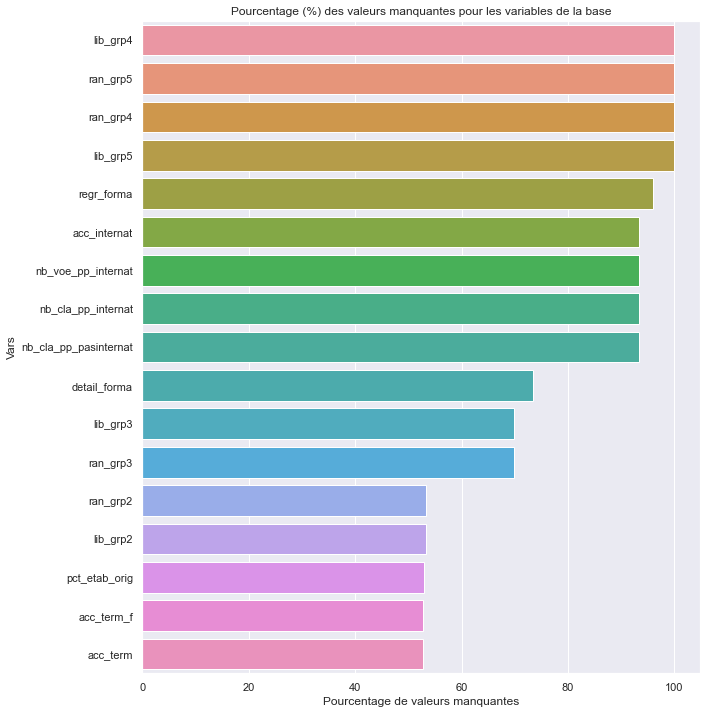

In [195]:
viz_na(missings, seuil = 30)

In [196]:
#Suppression des variables "non pertinentes"
    #Critère 1 : sum(NA)>30%
var_del1 = list(missings[missings['Pourcentage de valeurs manquantes']>30]['Vars'])
    #Critère 2 : "pas itules pour l'analyse actuellement"
var_del2 = ['geometry.coordinates', 'geometry.type', 'datasetid','recordid','record_timestamp',  'g_olocalisation_des_formations', 'lien_form_psup', 'detail_forma', 'session']
var_del = list(np.unique(var_del1 + var_del2))

In [197]:
df = df.drop(var_del, axis = 1)

In [198]:
df.head()

,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,fil_lib_voe_acc,acc_brs,acc_bg,tri,acc_bg_mention,form_lib_voe_acc,cod_aff_form,fili,prop_tot_bp_brs,acad_mies,taux_adm_psup_gen,contrat_etab,pct_bp_mention,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,lib_comp_voe_ins,pct_acc_debutpp,dep,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,g_ea_lib_vx,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,region_etab_aff,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,lib_grp1,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,nb_voe_pc_bg,dep_lib,acc_bp,select_form,acc_b,pct_acc_datebac,taux_adm_psup_techno
cod_uai,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9741380G,21,19,4,30.769231,Métiers de l'eau,9,1,2_Lycées,0,BTS - Production,23320,BTS,3.0,La Réunion,6.0,Public,15.38,13.0,1,3,10,38,96,2.0,13.0,92.31,37.0,15,145,140,Lycée de St Paul 4 - BTS - Production - Métier...,12.50,974,4.0,0.0,22.0,0.0,6,12,Lycée de St Paul 4,46.153846,3,81.25,2,12,41.0,7.692308,69.23,1,12,12.50,7,90,47,1,12.0,16,La Réunion,2,76.923077,3.0,57,0,13,2,4,0,3.0,15.0,3,8,2,Bacheliers technologiques toutes séries,50,13,5,0.00,15.384615,2.0,81.25,92.31,1,10,23.076923,34.0,53.85,67,0,La Réunion,2,formation selective,3,75.00,81.0
0632001H,9,8,3,0.000000,"Analyse, conduite et stratégie de l'entreprise...",0,0,2_Lycées,0,BTS - Agricole,23461,BTS,2.0,Clermont-Ferrand,0.0,Public,100.00,1.0,0,3,0,2,11,0.0,100.0,0.00,9.0,1,46,31,AgroSup Dijon Direction Enseignement à Distanc...,100.00,63,8.0,100.0,2.0,0.0,0,0,AgroSup Dijon Direction Enseignement à Distanc...,0.000000,2,100.00,0,6,4.0,0.000000,0.00,9,0,0.00,0,20,25,3,1.0,1,Auvergne-Rhône-Alpes,0,0.000000,3.0,4,0,2,1,0,1,5.0,20.0,0,3,0,Tous les candidats sauf les Bac technologiques...,23,1,15,0.00,100.000000,1.0,100.00,0.00,5,2,0.000000,65.0,0.00,8,1,Puy-de-Dôme,1,formation selective,0,100.00,0.0
0632001H,158,26,28,50.000000,Aménagements paysagers,0,1,2_Lycées,0,BTS - Agricole,23462,BTS,8.0,Clermont-Ferrand,25.0,Public,50.00,3.0,1,22,0,13,53,4.0,25.0,0.00,40.0,3,455,265,AgroSup Dijon Direction Enseignement à Distanc...,25.00,63,21.0,0.0,10.0,0.0,1,0,AgroSup Dijon Direction Enseignement à Distanc...,50.000000,13,75.00,6,24,54.0,50.000000,0.00,114,0,50.00,0,126,117,36,3.0,4,Auvergne-Rhône-Alpes,3,0.000000,25.0,13,0,10,1,1,0,31.0,20.0,2,35,2,Bacheliers technologiques toutes séries,158,2,190,0.00,50.000000,1.0,50.00,0.00,21,9,0.000000,46.0,0.00,45,27,Puy-de-Dôme,1,formation selective,0,75.00,50.0
0632001H,113,38,61,62.500000,Gestion et protection de la nature,1,3,2_Lycées,1,BTS - Agricole,23464,BTS,6.0,Clermont-Ferrand,50.0,Public,12.50,18.0,1,42,3,5,45,2.0,25.0,0.00,15.0,18,271,257,AgroSup Dijon Direction Enseignement à Distanc...,10.00,63,13.0,0.0,3.0,0.0,2,0,AgroSup Dijon Direction Enseignement à Distanc...,25.000000,2,90.00,9,20,24.0,37.500000,12.50,10,0,55.00,1,148,107,0,15.0,20,Auvergne-Rhône-Alpes,4,37.500000,26.0,13,0,14,1,5,0,53.0,30.0,12,64,11,Bacheliers professionnels toutes séries,124,8,14,12.50,25.000000,2.0,40.00,0.00,4,8,12.500000,52.0,12.50,22,2,Puy-de-Dôme,2,formation selective,1,75.00,25.0
0261286G,256,114,134,66.666667,Management Commercial Opérationnel,1,7,2_Lycées,2,BTS - Services,24303,BTS,13.0,Grenoble,47.0,Privé hors contrat,8.33,14.0,0,93,3,35,173,12.0,13.0,100.00,84.0,15,729,677,Ecole technique privée EPSECO - BTS - Services...,6.67,26,23.0,0.0,26.0,0.0,4,12,Ecole technique privée EPSECO,33.333333,0,93.33,23,90,117.0,58.3

In [199]:
#Récapitulatif
missings_new = miss(df)


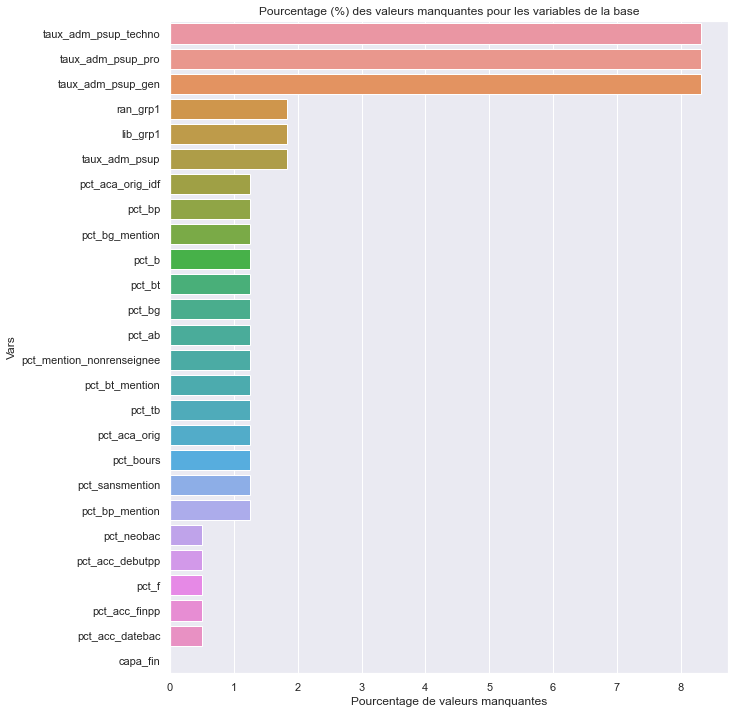

In [200]:
#Variables avec au moins une valeurs manquantes :  max = 8,5..%
viz_na(missings_new, seuil = 0)

In [201]:
#Capacité de l'établissement par formation
df['capa_fin'].isna().sum()

#Un établissement

1

In [202]:
df[df['capa_fin'].isna()]

,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,fil_lib_voe_acc,acc_brs,acc_bg,tri,acc_bg_mention,form_lib_voe_acc,cod_aff_form,fili,prop_tot_bp_brs,acad_mies,taux_adm_psup_gen,contrat_etab,pct_bp_mention,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,lib_comp_voe_ins,pct_acc_debutpp,dep,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,g_ea_lib_vx,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,region_etab_aff,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,lib_grp1,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,nb_voe_pc_bg,dep_lib,acc_bp,select_form,acc_b,pct_acc_datebac,taux_adm_psup_techno
cod_uai,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0120024L,0,0,0,NaN,FCIL classe passerelle BTS,0,0,3_Autres formations,0,Mention complémentaire,22402,Autre formation,1.0,Toulouse,NaN,Public,NaN,0.0,0,0,0,0,0,0.0,NaN,NaN,0.0,0,0,0,Lycée Alexis Monteil - Mention complémentaire ...,NaN,12,1.0,NaN,0.0,NaN,0,0,Lycée Alexis Monteil,NaN,0,NaN,0,0,NaN,NaN,NaN,0,0,NaN,0,0,1,0,0.0,0,Occitanie,0,NaN,0.0,0,0,0,0,0,0,0.0,NaN,0,0,0,NaN,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0,NaN,NaN,NaN,0,0,Aveyron,0,formation selective,0,NaN,NaN


In [203]:
df.drop('0120024L', inplace= True, axis = 'index')

#### Imputation des valeurs manquantes

In [204]:
#Concentrons nous d'abord sur ces variables

In [205]:
any_miss = list(missings_new[missings_new['Pourcentage de valeurs manquantes'] > 0]['Vars'])

In [206]:
for key in any_miss:
    print("{}: {}\n".format(key,names[key]))

taux_adm_psup_techno: Dont taux d’accès des candidats ayant un bac TECHNO ayant postulé à la formation

taux_adm_psup_pro: Dont taux d’accès des candidats ayant un bac PRO ayant postulé à la formation

taux_adm_psup_gen: Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation

ran_grp1: Rang du dernier appelé du groupe 1

lib_grp1: Regroupeme nt 1 effectué par les formations pour les classements

taux_adm_psup: Taux d’accès des candidats ayant postulé à la formation (ratio entre le dernier appelé et le nombre vœux PP)

pct_aca_orig_idf: % d_admis néo bacheliers issus de la même académie (paris/créteil/versailles réunies)

pct_bp: % d_admis néo bacheliers professionnels

pct_bg_mention: dont % d_admis avec mention

pct_b: % d_admis néo bacheliers avec mention Bien au bac

pct_bt: % d_admis néo bacheliers technologiques

pct_bg: % d_admis néo bacheliers généraux

pct_ab: % d_admis néo bacheliers avec mention assez Bien au bac

pct_mention_nonrenseignee: % d_admi

In [207]:
#Ces variables sont liées et peuvent être recalculées avec les données donc pas besoin d'imputation
# taux_adm_psup = sum(rank) / nb_voe_pp
taux = ['taux_adm_psup', 'taux_adm_psup_techno' , 'taux_adm_psup_pro', 'taux_adm_psup_gen']

In [208]:
df_any_miss = df[any_miss]

In [209]:
#Relation entre les variables : 

#pct_neobac = pct_bg + pct_bt + pct_bp + Autre
#acc_tot = acc_neobac + Autre
#pct_neobac = pct_bours + Autre = pct_sansmention + pct_ab + pct_b + pct_tb + pact_mention_nonrenseigne

In [210]:
#On a aucune informations sur les répartitions des admis
cond = (df_any_miss['pct_neobac'].isna()) & ((df_any_miss['pct_bg'].isna()) & (df_any_miss['pct_bt'].isna()) & (df_any_miss['pct_bp'].isna()) )
df[cond]
#Existerait-il des établissements sans admis? 
#Des établissement qui n'ont pas reçu aucune réponse sur leurs propositions
df[df['acc_tot'] ==0]
#S'agit-il de ces établissements : effectivement!
df[df['acc_tot'] ==0].compare(df[cond])
#Il est intéressant de voir ces établissements : ceux qui les caractérisent

cod_uai


In [211]:
#En excluant ces établissements on peut corriger les valeurs manquantes sur les pct en utilisant les effectif
for key in ['acc_tot','acc_brs', 'acc_neobac', 'acc_ab', 'acc_b', 'acc_tb', 'acc_bg','acc_bg_mention','acc_bt', 'acc_bt_mention', 'acc_bp', 'acc_bp_mention', 'acc_at'] : 
    print("{}: {}\n".format(key,names[key]))         
            
        

acc_tot: Effectif total des candidats ayant accepté la proposition del_établisseme nt (admis)

acc_brs: dont effectif des admis boursiers néo bacheliers

acc_neobac: Effectif des admis néobacheliers

acc_ab: dont effectif des admis néo bacheliers avec mention assez Bien au bac

acc_b: dont effectif des admis néo bacheliers avec mention Bien au bac

acc_tb: dont effectif des admis néo bacheliers avec mention Très Bien au bac

acc_bg: Effectif des admis néo bacheliers généraux

acc_bg_mention: Effectif des admis néo bacheliers généraux ayant eu une mention au bac

acc_bt: Effectif des admis néo bacheliers technologiques

acc_bt_mention: Effectif des admis néo bacheliers technologiqu es ayant eu une mention au bac

acc_bp: Effectif des admis néo bacheliers professionnels

acc_bp_mention: Effectif des admis néo bacheliers professionne ls ayant eu une mention au bac

acc_at: Effectif des autres candidats admis



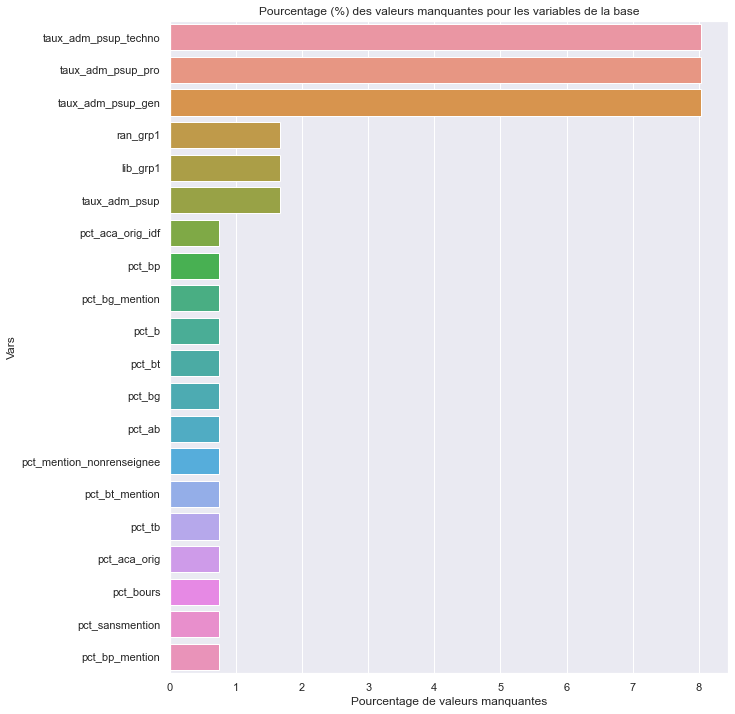

In [212]:
#Pour les établissements ayant au moins un admis, on a pas de valeurs manquantes sur les effectifs désagrégés (bg, bt, bp etc)
#On peut donc corriger les pourcentages!!
df_no_acc = df[(df['acc_tot']==0)]
viz_na(miss(df[(df['acc_tot']!=0)]), 0)

In [213]:
df_any_acc = df[df['acc_tot']!=0]
df_any_acc.shape


(12691, 94)

In [214]:
#Correction pour les agrégation selon le type de formation
dic = {'pct_bg' : 'acc_bg', 'pct_bt' : 'acc_bt', 'pct_bp' : 'acc_bp'}

In [215]:
df_any_acc.reset_index(inplace=True)
for pct, eff in dic.items() :
    #Dans le cas où le dénominateur est null, on remplace par 0
    df_any_acc0 = df_any_acc[(df_any_acc[pct].isna()) & (df_any_acc[eff] == 0)].fillna({pct : 0})
    df_any_acc = df_any_acc0.append(df_any_acc[~((df_any_acc[pct].isna()) & (df_any_acc[eff] == 0))].fillna({pct : 0}))
    #Dans le cas où le dénominateur n'est pas null, on applique la formule
    #df_any_acc_not_null = df_any_acc[(df_any_acc[pct].isna()) & (df_any_acc[eff] != 0)].fillna({pct : 100*df_any_acc[eff]/df_any_acc['acc_tot']})
    #Base finale
    #df_any_acc = df_any_acc_null.append(df_any_acc_not_null, ignore_index=True)

In [216]:
#On crée la variable qui capte le pourcentage des autres candidats admis
df_any_acc['pct_at'] = 100 - (df_any_acc['pct_neobac'])
df_any_acc.acc_at = df_any_acc.acc_tot - df_any_acc.acc_neobac

In [217]:
df_any_acc.shape

(12691, 96)

In [218]:
#Correction pour les agrégation selon la mention
dic = {'pct_bg_mention' : ['acc_bg_mention', 'acc_bg'], 'pct_bt_mention' : ['acc_bt_mention', 'acc_bt'], 'pct_bp_mention' : ['acc_bp_mention', 'acc_bp']}

In [219]:

for pct, eff in dic.items() :
    #df_any_acc[pct] = df_any_acc[eff]/df_any_acc['acc_tot']
    
    #df_any_acc[df_any_acc[eff[1]]!=0][pct].fillna(df_any_acc[df_any_acc[eff[1]!=0].isna()][eff[0]]/df_any_acc[~df_any_acc[eff[1]]!=0][eff[1]], inplace=True)
    #df_any_acc[df_any_acc[eff[1]]==0][pct].fillna(0, inplace=True)
    
    #Dans le cas où le dénominateur est null, on remplace par 0
    df_any_acc0 = df_any_acc[(df_any_acc[pct].isna()) & (df_any_acc[eff[1]] == 0)].fillna({pct : 0})
    df_any_acc = df_any_acc0.append(df_any_acc[~((df_any_acc[pct].isna()) & (df_any_acc[eff[1]] == 0))].fillna({pct : 0}))
    #Dans le cas où le dénominateur n'est pas null, on applique la formule
    #df_any_acc = df_any_acc[(df_any_acc[pct].isna()) & (df_any_acc[eff[1]] != 0)].fillna({pct : 100*df_any_acc[eff[0]]/df_any_acc[eff[1]]})


In [220]:
df_any_acc.shape

(12691, 96)

In [221]:
#Il semble que les valeurs manquantes sont seulement pour les établiblissements où pct_neobac=0 (normal), vérifions !
cond = (df_any_acc.pct_mention_nonrenseignee.isna()) & (df_any_acc.pct_bours.isna()) & (df_any_acc.pct_tb.isna()) & (df_any_acc.pct_b.isna()) & (df_any_acc.pct_ab.isna()) & (df_any_acc.pct_sansmention.isna())  & (df_any_acc.pct_b.isna()) & (df_any_acc.pct_aca_orig.isna()) & (df_any_acc.pct_aca_orig_idf.isna())

In [222]:
var = ['pct_tb', 'pct_b', 'pct_ab', 'pct_sansmention', 'pct_bours','pct_mention_nonrenseignee',  'pct_aca_orig', 'pct_aca_orig_idf']


In [223]:
df_any_acc[var][cond]

,pct_tb,pct_b,pct_ab,pct_sansmention,pct_bours,pct_mention_nonrenseignee,pct_aca_orig,pct_aca_orig_idf
2375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
df_any_acc[var][df_any_acc['pct_neobac']==0]

,pct_tb,pct_b,pct_ab,pct_sansmention,pct_bours,pct_mention_nonrenseignee,pct_aca_orig,pct_aca_orig_idf
2375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
#Les bases sont identiques
df_any_acc[['pct_neobac', 'pct_tb', 'pct_b', 'pct_ab', 'pct_sansmention', 'pct_bours', 'pct_mention_nonrenseignee',  'pct_aca_orig', 'pct_aca_orig_idf']][df_any_acc['pct_neobac']==0].compare(df_any_acc[['pct_neobac', 'pct_tb', 'pct_b', 'pct_ab', 'pct_sansmention', 'pct_bours', 'pct_mention_nonrenseignee',  'pct_aca_orig', 'pct_aca_orig_idf']][cond])
#Donc on remplace seulement les NA par 0 

Empty DataFrame
Columns: []
Index: []

In [226]:
df_any_acc[var] = df_any_acc[var].apply(lambda x : x.fillna(0))

In [227]:
df_any_acc[var][df_any_acc['pct_neobac']==0]

,pct_tb,pct_b,pct_ab,pct_sansmention,pct_bours,pct_mention_nonrenseignee,pct_aca_orig,pct_aca_orig_idf
2375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


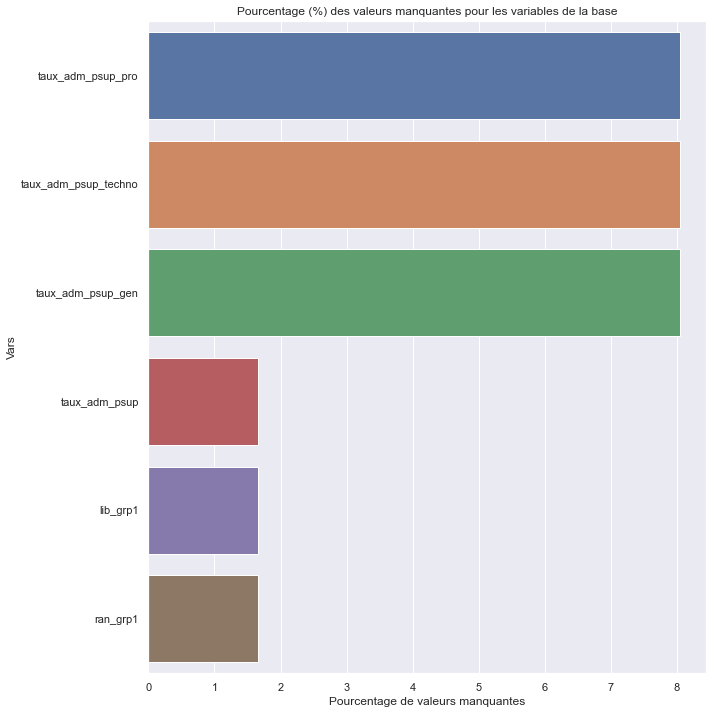

In [228]:
viz_na(miss(df_any_acc), 0)

In [229]:
#Pour les établissements où on a pas de postulants pour un type de bac donné (général, tech ou pro) le NaN dans le taux d'admis est en réalité un 0

#Correction
dic = {'pct_bg' : 'taux_adm_psup_gen', 'pct_bt' : 'taux_adm_psup_techno', 'pct_bp' : 'taux_adm_psup_pro'}

In [230]:
df_any_acc[(df_any_acc['taux_adm_psup_gen']>0) & (df_any_acc['pct_bg']==0)][['pct_at', 'taux_adm_psup_gen','pct_bt', 'pct_bp', 'pct_bg', 'pct_neobac', 'taux_adm_psup' ]]

,pct_at,taux_adm_psup_gen,pct_bt,pct_bp,pct_bg,pct_neobac,taux_adm_psup
2413,100.00,100.0,0.000000,0.000000,0.0,0.00,19.0
6560,100.00,100.0,0.000000,0.000000,0.0,0.00,100.0
6723,100.00,81.0,0.000000,0.000000,0.0,0.00,NaN
6892,100.00,100.0,0.000000,0.000000,0.0,0.00,100.0
6980,100.00,93.0,0.000000,0.000000,0.0,0.00,22.0
...,...,...,...,...,...,...,...
12617,55.56,22.0,0.000000,100.000000,0.0,44.44,16.0
12648,50.00,50.0,0.000000,100.000000,0.0,50.00,9.0
12658,42.86,29.0,50.000000,50.000000,0.0,57.14,82.0
12662,33.33,33.0,0.000000,100.000000,0.0,66.67,100.0


In [231]:
##BASE PROPRE
#Les établissements ayant au moins reçu une demande admission
df_any_acc.set_index("cod_uai", inplace = True)
#Les établissements ayant reçu aucune demande admission
df_no_acc.fillna(0, inplace=True)
df_no_acc['pct_at'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\SOWDOU~1\AppData\Local\Temp/ipykernel_9696/3361245879.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_acc['pct_at'] = 0


In [232]:
#Variable d'identification
df_any_acc['Reçu au moins une admission'] = 'Oui'
df_no_acc['Reçu au moins une admission'] = 'Non'

C:\Users\SOWDOU~1\AppData\Local\Temp/ipykernel_9696/3808122394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_acc['Reçu au moins une admission'] = 'Non'


In [251]:
#Merging des bases
base_globale = pd.concat([df_any_acc, df_no_acc])
base_globale.reset_index(inplace = True)
base_globale.set_index('g_ea_lib_vx', inplace=True)

In [151]:
labels = base_globale.fili.unique()

In [149]:
labels

array([ 1,  8,  9,  5,  0,  4,  2,  3, 10,  7,  6], dtype=int8)

In [148]:
base_globale.fili.unique()

array([ 1,  8,  9,  5,  0,  4,  2,  3, 10,  7,  6], dtype=int8)

In [152]:
#Catégorisation
for colonne in base_globale.select_dtypes(['object','category']).columns:
    base_globale[colonne]=base_globale[colonne].astype('category').cat.codes

In [273]:
table = base_globale[['cod_uai', 'fili']].pivot_table(index='cod_uai', columns='fili', aggfunc=len)

In [336]:
matrix = 1-1*table.isna()

In [337]:
matrix.reset_index(inplace = True)

In [338]:
matrix = matrix.melt(id_vars='cod_uai', value_vars=matrix.columns, var_name='Filière', value_name='Fréquence')

In [339]:
matrix = matrix.groupby('Filière').sum()

In [340]:
matrix['Pourcentage (%)'] = matrix['Fréquence']/table.shape[0]*100

In [353]:
matrix.sort_values(by='Pourcentage (%)',  inplace=True, ascending=False)

**Quelles sont les filières les plus présentes ?**

Le graphe ci-dessous montre la filière BTS est celle la plus fréquente au niveau des établissements. Plus de 50% des établissement offrent une formation débouchant sur un diplôme BTS. Les filières les plus rares (moins de 5% des établissements) sont la filière Licence accès Santé, la filière EFTS, les écoles de commerce et la filière Parcours Accès Santé Spécifique qui n'est proposée que par 1% des établissements.

Text(0.5, 1.0, 'Graphique 1 : Taux de participation des établissements selon la filière de formation')

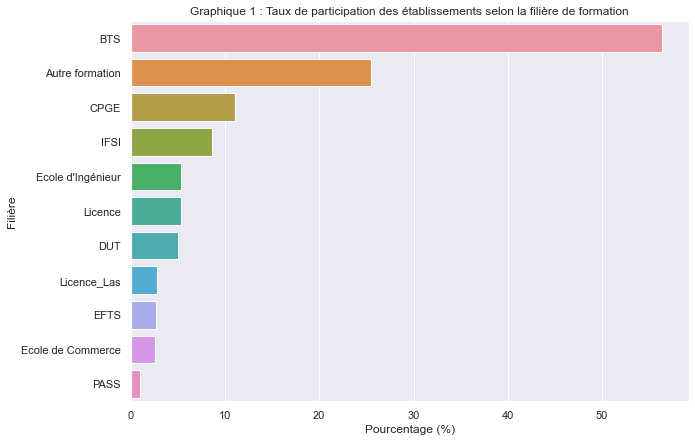

In [362]:
#Répartition des établissemnts selon les filières
plt.subplots(figsize=(10, 7))
sns.barplot(y=matrix.index,  x="Pourcentage (%)", data=matrix, ci=None).set_title("Graphique 1 : Taux de participation des établissements selon la filière de formation")


In [ ]:
sns.pairplot(data=base_globale, hue="fili")

In [100]:
#histogramme
def graph(data):
    data = 
    for colonne in data.columns:
        print('***************************************************************************')
        print('             :------------',colonne,'------------:')
        print('***************************************************************************')
        df[colonne].hist()
        plt.show()

***************************************************************************
             :------------ nb_voe_pp_at ------------:
***************************************************************************


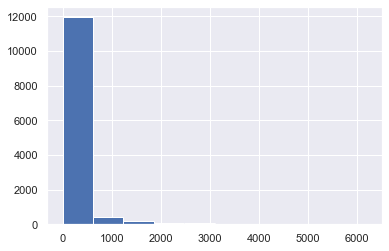

***************************************************************************
             :------------ nb_voe_pp_bp ------------:
***************************************************************************


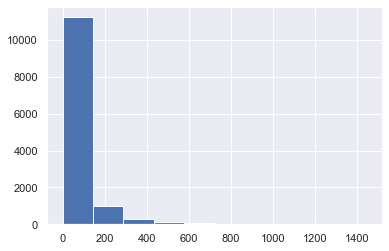

***************************************************************************
             :------------ nb_voe_pp_bg ------------:
***************************************************************************


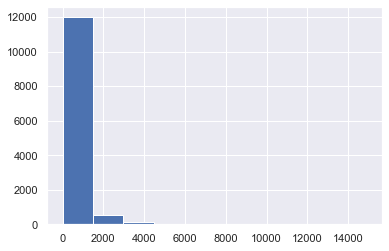

***************************************************************************
             :------------ pct_sansmention ------------:
***************************************************************************


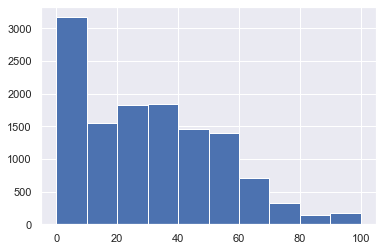

***************************************************************************
             :------------ fil_lib_voe_acc ------------:
***************************************************************************


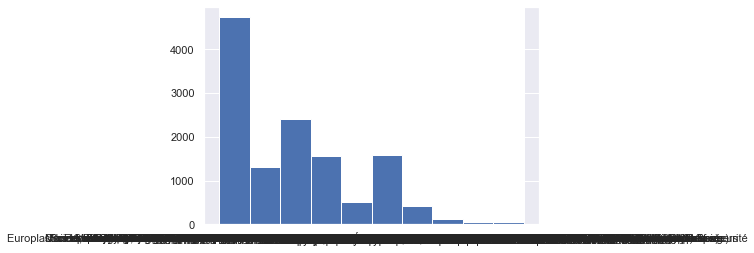

***************************************************************************
             :------------ acc_brs ------------:
***************************************************************************


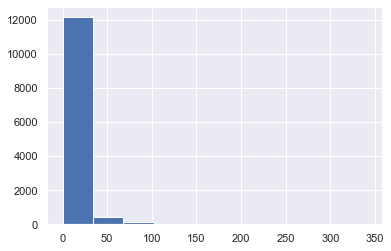

***************************************************************************
             :------------ acc_bg ------------:
***************************************************************************


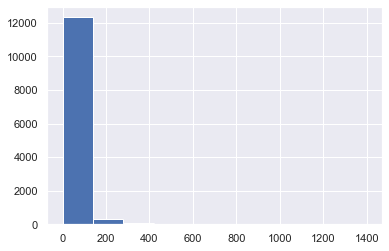

***************************************************************************
             :------------ tri ------------:
***************************************************************************


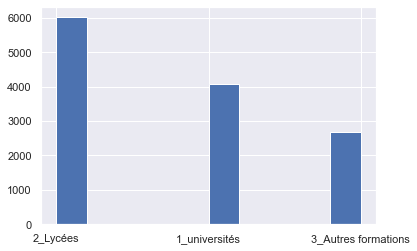

***************************************************************************
             :------------ acc_bg_mention ------------:
***************************************************************************


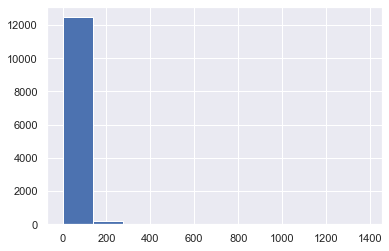

***************************************************************************
             :------------ form_lib_voe_acc ------------:
***************************************************************************


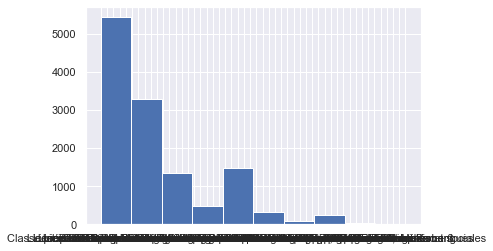

***************************************************************************
             :------------ cod_aff_form ------------:
***************************************************************************


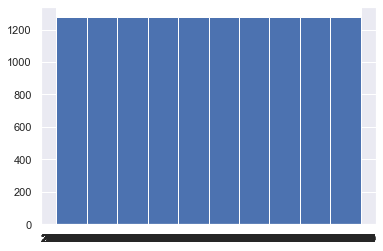

***************************************************************************
             :------------ fili ------------:
***************************************************************************


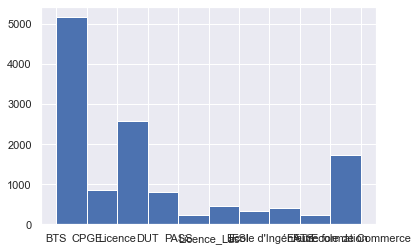

***************************************************************************
             :------------ prop_tot_bp_brs ------------:
***************************************************************************


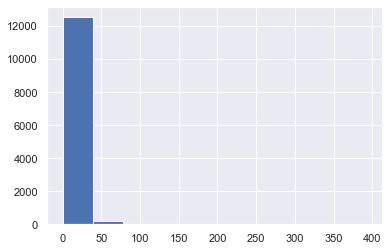

***************************************************************************
             :------------ acad_mies ------------:
***************************************************************************


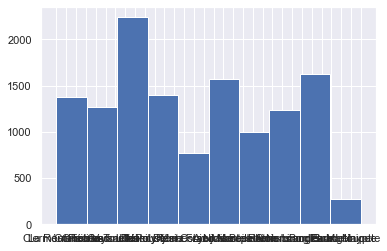

***************************************************************************
             :------------ taux_adm_psup_gen ------------:
***************************************************************************


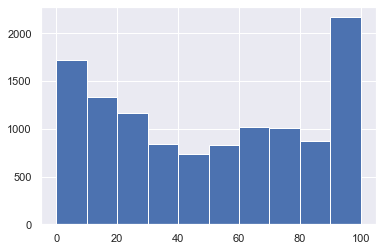

***************************************************************************
             :------------ contrat_etab ------------:
***************************************************************************


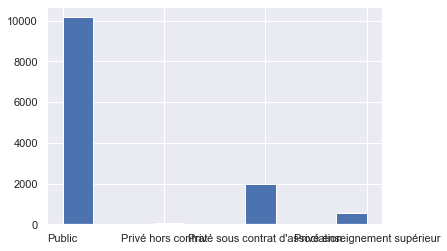

***************************************************************************
             :------------ pct_bp_mention ------------:
***************************************************************************


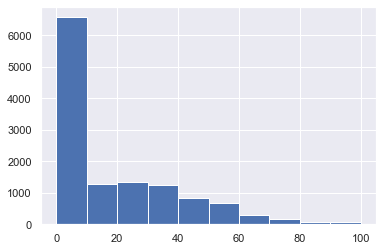

***************************************************************************
             :------------ acc_finpp ------------:
***************************************************************************


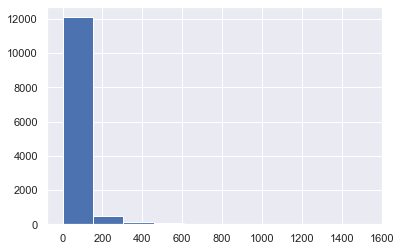

***************************************************************************
             :------------ acc_pc ------------:
***************************************************************************


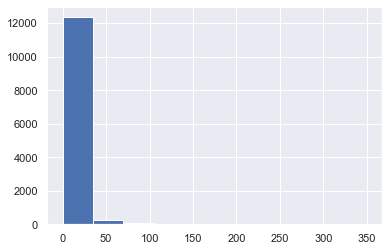

***************************************************************************
             :------------ nb_cla_pp_bg ------------:
***************************************************************************


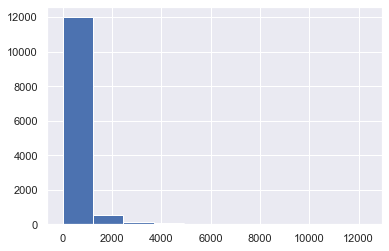

***************************************************************************
             :------------ acc_bt ------------:
***************************************************************************


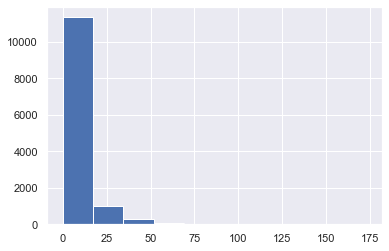

***************************************************************************
             :------------ nb_cla_pp_bt_brs ------------:
***************************************************************************


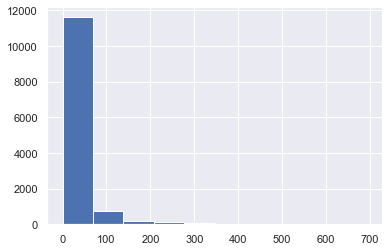

***************************************************************************
             :------------ nb_voe_pp_bt ------------:
***************************************************************************


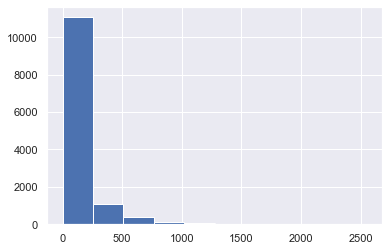

***************************************************************************
             :------------ prop_tot_bg_brs ------------:
***************************************************************************


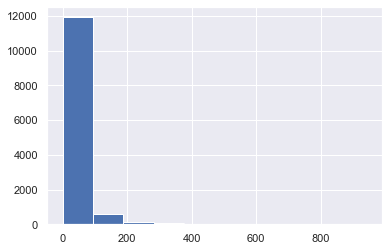

***************************************************************************
             :------------ taux_adm_psup_pro ------------:
***************************************************************************


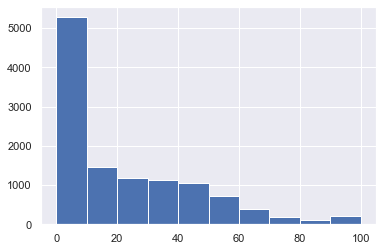

***************************************************************************
             :------------ pct_aca_orig ------------:
***************************************************************************


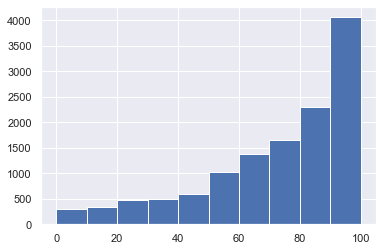

***************************************************************************
             :------------ prop_tot_bt ------------:
***************************************************************************


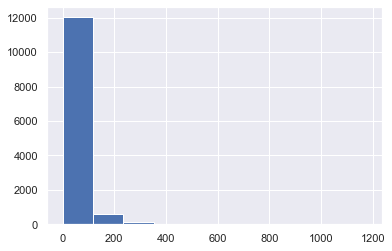

***************************************************************************
             :------------ acc_pp ------------:
***************************************************************************


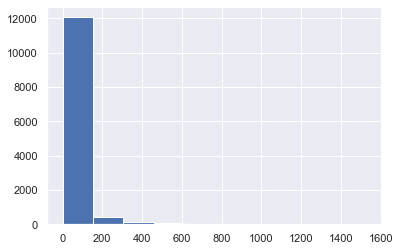

***************************************************************************
             :------------ voe_tot ------------:
***************************************************************************


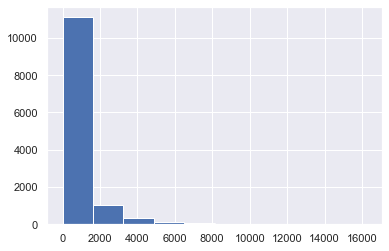

***************************************************************************
             :------------ nb_voe_pp ------------:
***************************************************************************


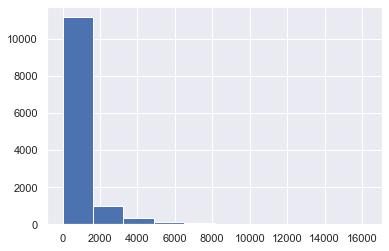

***************************************************************************
             :------------ lib_comp_voe_ins ------------:
***************************************************************************


KeyboardInterrupt: 

In [101]:
graph(base_globale)

In [ ]:
###Corrélation_Matrice
corrMatrix = df_n.corr()
sns.heatmap(corrMatrix, annot=False)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('Matrice_Correlation.png')

In [ ]:
### STATISTIQUES

In [ ]:
## Effectif total des candidats pour une formation : voe_tot

In [ ]:
#selon le sexe

df['voe_tot_%_filles'] = 100*df['voe_tot_f']/df['voe_tot']

In [ ]:
df['voe_tot_%_filles'].describe()

In [ ]:
df['g_ea_lib_vx'][df['voe_tot_%_filles'] == 0]

In [ ]:
sns.barplot(x="voe_tot",  y="tri", data=df, ci=None)


In [ ]:
sns.barplot(x="voe_tot_f",  y="tri", data=df, ci=None)

In [ ]:
data = df[['g_ea_lib_vx','voe_tot',  'voe_tot_%_filles']].melt('g_ea_lib_vx', var_name='Type', value_name='effectif')

In [ ]:
li = list(df['voe_tot']) + list(df['voe_tot_f'])

In [ ]:
#create DataFrame
df_p = pd.DataFrame({'Valeurs':list(df['voe_tot']) + list(df['voe_tot_f']),
                     
                   'Tri': list(df['tri'])+ list(df['tri'])
                     ,
                     
                   'Iden':['Total']*len(df)+ ['Filles']*len(df)
                               })

In [ ]:
df_p

In [ ]:
sns.barplot(x="Valeurs",  y="Tri", data=df_p, ci=None, hue = 'Iden')

In [ ]:
df["filles"] = df['voe_tot_f']
df["garcons"] = df['voe_tot'] - df['voe_tot_f']
hom = fem = df[['tri','garcons']].groupby('tri').sum()
fem = df[['tri','filles']].groupby('tri').sum()

In [ ]:
base = pd.concat([hom,fem],axis = 1)
base.reset_index(inplace = True)

In [ ]:
base['garcons'] = 100*base['garcons']/(base['garcons'] + base['filles'])

In [ ]:
base['filles'] =100- base['garcons']

In [ ]:
base_ =base.melt('tri', var_name='Sexe', value_name= "Valeurs")
base_

In [ ]:
plt.subplots(figsize=(12, 5))
sx = sns.barplot(x="Valeurs",  y="tri", data=base_, ci=None, hue = 'Sexe')
x_labels = base_['Valeurs']
sx.set 

### 1.3 INSERTION PROFESSIONNEL



https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset=fr-esr-insertion_professionnelle-lp&q=&rows=1500&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018

In [ ]:
insertion = glob_path + "fr-esr-insertion_professionnelle-"
niveau = ["lp", "master"]
complement = "&q=&rows=1500&sort=-annee&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018"

In [ ]:
#Récupération selon le niveau
data_insertion = [requests.get(insertion + niveau[x] + complement) for x in range(2)]

In [ ]:
#Conversion de json à pd.Dataframe
data_insertion = [pd.json_normalize(x.json()['records'][:]) for x in data_insertion ]

In [ ]:
###Les données selon le niveau sont identifiées par la varibale datsetid

In [ ]:
data_insertion[0].shape

In [ ]:
data_insertion[1].shape

In [ ]:
glob_data_insertion = pd.concat(data_insertion)
glob_data_insertion.columns = [c.replace('fields.', '') for c in list(glob_data_insertion.columns) ]

In [ ]:
glob_data_insertion.head()

# ---------------------------------------------KHARIRATOU---------------------------------------------

In [ ]:
df = glob_data_insertion.copy()

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
df['na']=np.nan

In [ ]:
df['na']

In [ ]:
df[df['taux_dinsertion']=='ns']

In [ ]:
df['taux_dinsertion'].replace({'ns': np.nan}, inplace = True)

In [ ]:
df[df['taux_dinsertion'] == 'nd'] = np.nan

In [ ]:
df[df['taux_dinsertion'] == 'nd']

In [ ]:
#création variable nombre de personnes insérées
df["taux_dinsertion"] = df["taux_dinsertion"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_insertion']= df["taux_dinsertion"]*df["nombre_de_reponses"]

In [ ]:
df_g.reset_index(inplace = True)

In [ ]:
df_g

# Répartition des insérés par discipline et par établissement

In [ ]:
# Répartition du nombre d'insérés par discipline
df_g =df.groupby(['discipline']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="discipline", data=df_g)

In [ ]:
df_g =df.groupby(['domaine']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="domaine", data=df_g)

In [ ]:
# Répartion du nombre des insérés par établissement
df_g =df.groupby(['cle_etab']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="cle_etab", data=df_g)

In [ ]:
# Répartion du nombre des insérés par établissement
df_g =df.groupby(['cle_etab']).sum('nb_insertion')
df_g.reset_index(inplace = True)
df_g

In [ ]:
#import pandas as pd
#pd.crosstab(df.cle_etab, df.nb_insertion).apply(lambda r: r/len(df), axis=1)

#freq = df.groupby(['cle_etab']).sum('nb_insertion').sort_values
#print(freq)

# Caractéristiques des sortants et caractéristiques des sortants insérés

## Par sexe

In [ ]:
#création variable nombre de femmes
df[df['femmes'] == 'ns'] = np.nan
df[df['femmes'] == 'nd'] = np.nan

df["femmes"] = df["femmes"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_femmes']= df["femmes"]*df["nombre_de_reponses"]

In [ ]:
# Répartition du nombre de femmes diplomées par discipline
df_g =df.groupby(['discipline']).sum('nb_femmes')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_femmes", y="discipline", data=df_g)

In [ ]:
df_g =df.groupby(['domaine']).sum('nb_femmes')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_femmes", y="domaine", data=df_g)

In [ ]:
# Représentation Proportion des femmes insérées selon l'établissement???
df['nb_femmes_inserees']= df["nb_femmes"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_femmes_inserees')
#df_g1.reset_index(inplace = True)
df_g1

In [ ]:
# Répartition proportion de femmes insérées par discipline
df_g2 =df.groupby(['discipline']).sum('nb_femmes_inserees')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_femmes_inserees", y="discipline", data=df_g2)

## Par nombre de boursiers

In [ ]:
#création variable nombre de diplomés boursiers
df[df['de_diplomes_boursiers'] == 'ns'] = np.nan
df[df['de_diplomes_boursiers'] == 'nd'] = np.nan

df["de_diplomes_boursiers"] = df["de_diplomes_boursiers"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_de_diplomes_boursiers']= df["de_diplomes_boursiers"]*df["nombre_de_reponses"]

In [ ]:
# nb de diplomés boursiers /etab /discipline
df_g =df.groupby(['discipline']).sum('nb_de_diplomes_boursiers')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_de_diplomes_boursiers", y="discipline", data=df_g)

In [ ]:
df_g =df.groupby(['domaine']).sum('nb_de_diplomes_boursiers')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_de_diplomes_boursiers", y="domaine", data=df_g)

In [ ]:
# Représentation Proportion de boursiers insérés selon l'établissement???
df['nb_boursiers_inseres']= df["nb_de_diplomes_boursiers"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_boursiers_inseres')
#df_g1.reset_index(inplace = True)
df_g1

In [ ]:
# Répartition proportion de boursiers insérés par discipline
df_g2 =df.groupby(['discipline']).sum('nb_boursiers_inseres')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_boursiers_inseres", y="discipline", data=df_g2)

## Par nombre d'emplois stables

In [ ]:
#création variable nombre d'emplois stables
df[df['emplois_stables'] == 'ns'] = np.nan
df[df['emplois_stables'] == 'nd'] = np.nan

df["emplois_stables"] = df["emplois_stables"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_emplois_stables']= df["emplois_stables"]*df["nombre_de_reponses"]

In [ ]:
# nb de emplois stables /etab /discipline
df_g =df.groupby(['discipline']).sum('nb_emplois_stables')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables", y="discipline", data=df_g)

In [ ]:
df_g =df.groupby(['domaine']).sum('nb_emplois_stables')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables", y="domaine", data=df_g)

In [ ]:
# Représentation Proportion de emplois stables des insérés selon l'établissement???
df['nb_emplois_stables_inseres']= df["nb_emplois_stables"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_emplois_stables_inseres')
#df_g1.reset_index(inplace = True)
df_g1

In [ ]:
# Répartition proportion de emplois stables des insérés par discipline
df_g2 =df.groupby(['discipline']).sum('nb_emplois_stables_inseres')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables_inseres", y="discipline", data=df_g2)

## Selon le salaire

In [ ]:
#création variable salaires bruts annuels estimés
df[df['salaire_brut_annuel_estime'] == 'ns'] = np.nan
df[df['salaire_brut_annuel_estime'] == 'nd'] = np.nan

df["salaire_brut_annuel_estime"] = df["salaire_brut_annuel_estime"].astype('float64')

In [ ]:
# Répartition des salaires bruts annuels /discipline
df_g =df.groupby(['discipline']).sum('salaire_brut_annuel_estime')
df_g.reset_index(inplace = True)
sns.barplot(x="salaire_brut_annuel_estime", y="discipline", data=df_g)

In [ ]:
df_g =df.groupby(['domaine']).sum('salaire_brut_annuel_estime')
df_g.reset_index(inplace = True)
sns.barplot(x="salaire_brut_annuel_estime", y="domaine", data=df_g)

In [ ]:
# Représentation de salaires bruts annuels selon l'établissement???
df_g1 =df.groupby(['cle_etab']).sum('salaire_brut_annuel_estime')
#df_g1.reset_index(inplace = True)
df_g1

# BROUILLON

In [ ]:
columns_names = pd.json_normalize(req.json()['facet_groups'][:])

In [ ]:
columns_names = list(ses_2020.columns)
columns_names1 = [c.replace('fields.', '') for c in columns_names ]

In [ ]:
dic=dict()
for i in range(len(columns_names)) :
    dic[columns_names[i]] = columns_names1[i]
ses_2020.rename(dic)